

# Classification-Master Template

How do you work through a predictive modeling- Classification or Regression based Machine learning problem end-to-end? 
In this jupyter note you will work through a case study classication predictive modeling problem in Python
including each step of the applied machine learning process. 
However, this notebook is applicable for Regression based case study as well. The Models, Grid Search and Evaluation Metrics will need to change for the regression based case study.


## Content

* [1. Introduction](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
    * [4.2.Handling Categorical Data](#3.2)
    * [4.3.Feature Selection](#3.3)
    * [4.3.Data Transformation](#3.4) 
        * [4.3.1 Rescaling ](#3.4.1)
        * [4.3.2 Standardization](#3.4.2)
        * [4.3.3 Normalization](#3.4.3)    
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train/Test Split](#4.1)
    * [5.2. Test Options and Evaluation Metrics](#4.2)
    * [5.3. Compare Models and Algorithms](#4.3)
        * [5.3.1 Common Classification Models](#4.3.1)
        * [5.3.2 Ensemble Models](#4.3.2)
        * [5.3.3 Deep Learning Models](#4.3.3)    
* [6. Model Tuning and Grid Search](#5)  
* [7. Finalize the Model](#6)  
    * [7.1. Results on test dataset](#6.1)
    * [7.1. Variable Intuition/Feature Selection](#6.2) 
    * [7.3. Save model for later use](#6.3)


<a id='0'></a>
# 1. Introduction

Our goal in this jupyter notebook is to under the following
- How to work through a predictive modeling problem end-to-end. This notebook is applicable both for regression and classification problems.
- How to use data transforms to improve model performance.
- How to use algorithm tuning to improve model performance.
- How to use ensemble methods and tuning of ensemble methods to improve model performance.
- How to use deep Learning methods.

The data is a subset of the German Default data (https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data) with the following attributes. Age, Sex, Job, Housing, SavingAccounts, CheckingAccount, CreditAmount, Duration, Purpose
- Following models are implemented and checked:  

    * Logistic Regression
    * Linear Discriminant Analysis
    * K Nearest Neighbors 
    * Decision Tree (CART)
    * Support Vector Machine 
    * Ada Boost
    * Gradient Boosting Method
    * Random Forest
    * Extra Trees
    * Neural Network - Shallow 
    * Deep Neural Network 

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [53]:
# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD

#Libraries for Saving the Model
from pickle import dump
from pickle import load

<a id='1.2'></a>
## 2.2. Loading the Data

In [54]:
# load dataset
dataset = read_csv('german_credit_data.csv')

In [55]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [56]:
type(dataset)

pandas.core.frame.DataFrame

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [57]:
# shape
dataset.shape

(1000, 10)

In [58]:
# peek at data
set_option('display.width', 100)
dataset.head(2)

,Age,Sex,Job,Housing,SavingAccounts,CheckingAccount,CreditAmount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad


In [59]:
# types
set_option('display.max_rows', 500)
dataset.dtypes

Age                 int64
Sex                object
Job                 int64
Housing            object
SavingAccounts     object
CheckingAccount    object
CreditAmount        int64
Duration            int64
Purpose            object
Risk               object
dtype: object

In [60]:
# describe data
set_option('precision', 3)
dataset.describe()

,Age,Job,CreditAmount,Duration
count,1000.000,1000.000,1000.000,1000.000
mean,35.546,1.904,3271.258,20.903
std,11.375,0.654,2822.737,12.059
min,19.000,0.000,250.000,4.000
25%,27.000,2.000,1365.500,12.000
50%,33.000,2.000,2319.500,18.000
75%,42.000,2.000,3972.250,24.000
max,75.000,3.000,18424.000,72.000


In [61]:
# class distribution
dataset.groupby('Housing').size()

Housing
free    108
own     713
rent    179
dtype: int64

<a id='2.2'></a>
## 3.2. Data Visualization

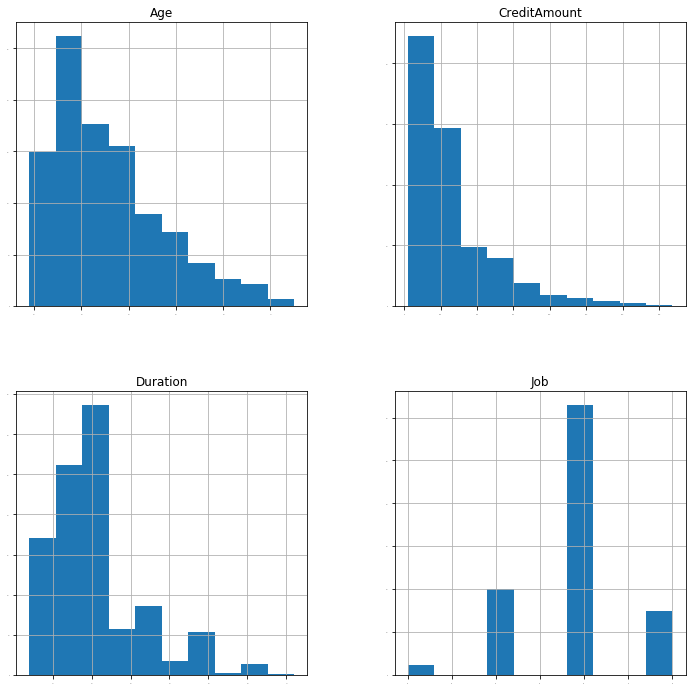

In [62]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

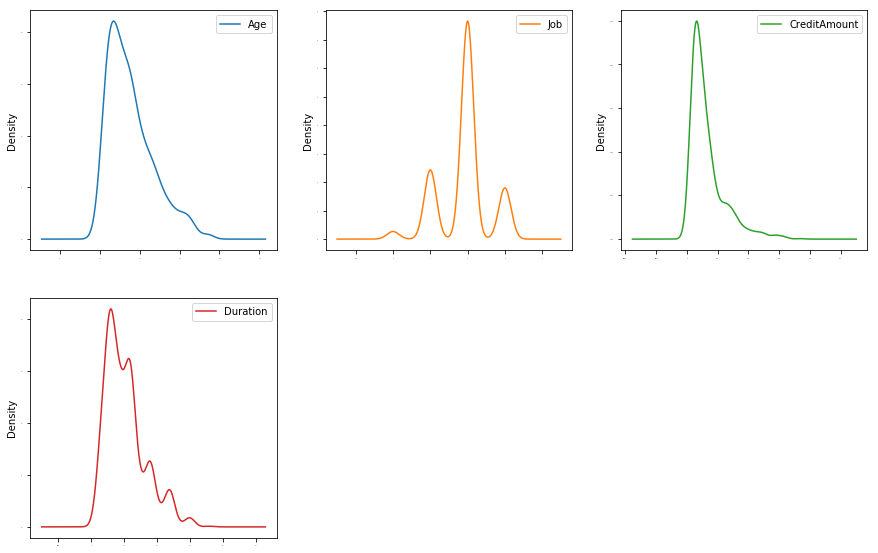

In [63]:
# density
dataset.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

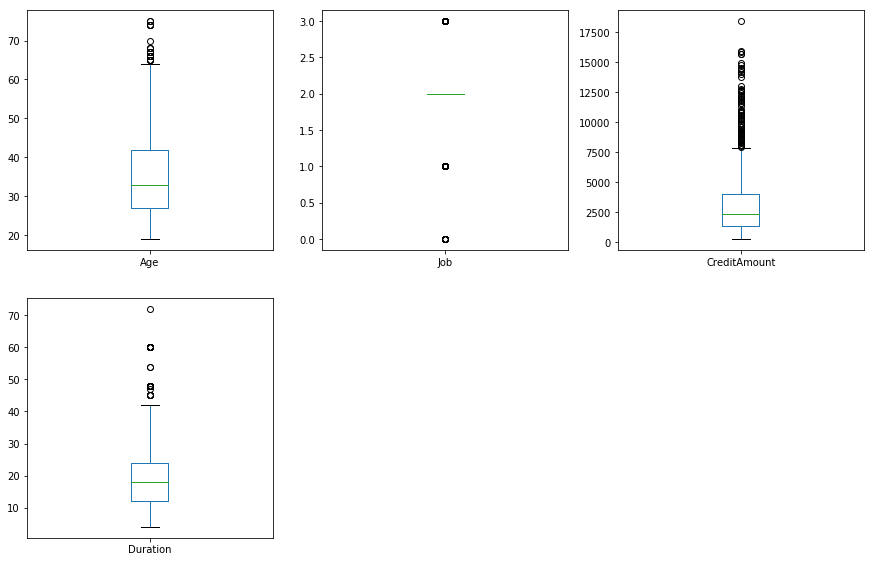

In [64]:
#Box and Whisker Plots
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
pyplot.show()

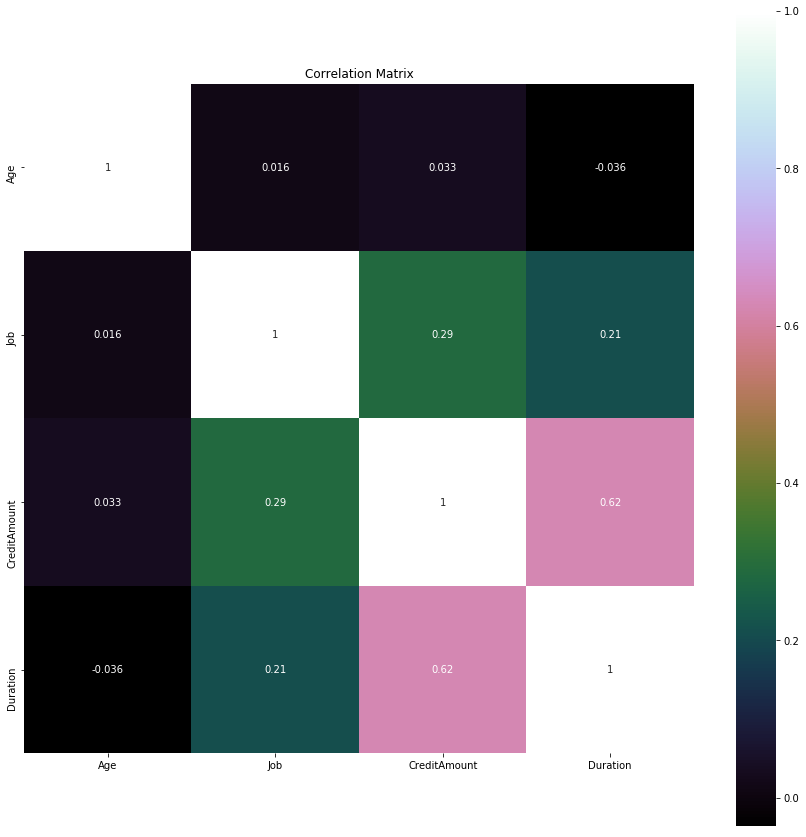

In [65]:
# correlation
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<Figure size 1080x1080 with 0 Axes>

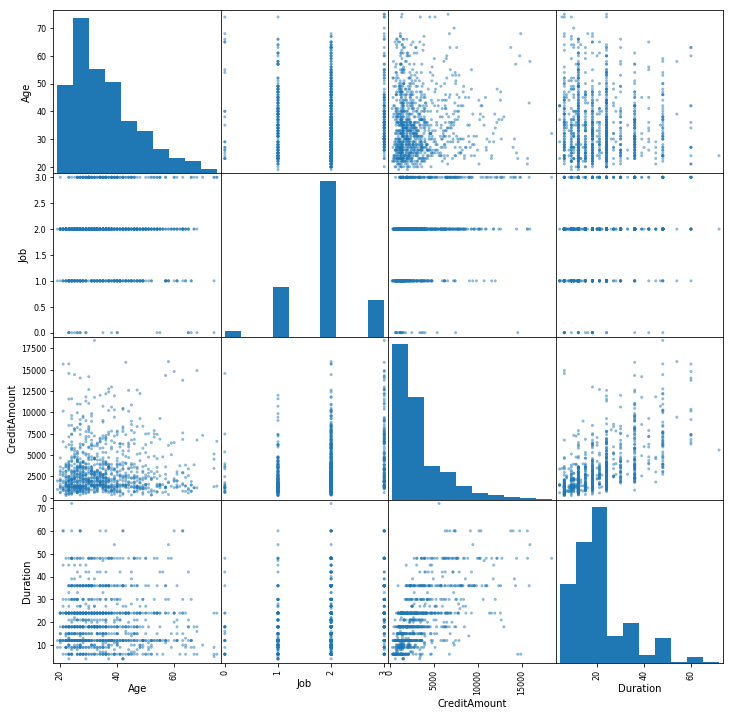

In [66]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix
pyplot.figure(figsize=(15,15))
scatter_matrix(dataset,figsize=(12,12))
pyplot.show()


<a id='3'></a>
## 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning
Check for the NAs in the rows, either drop them or fill them with the mean of the column

In [67]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


Given that there are null values drop the rown contianing the null values.

In [68]:
# Drop the rows containing NA
dataset = dataset.dropna(axis=0)
# Fill na with 0
#dataset.fillna('0')

#Filling the NAs with the mean of the column.
#dataset['col'] = dataset['col'].fillna(dataset['col'].mean())

<a id='3.2'></a>
## 4.2. Handling Categorical Data

In [69]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
dataset["Sex_Code"] = lb_make.fit_transform(dataset["Sex"])
dataset["Housing_Code"] = lb_make.fit_transform(dataset["Housing"])
dataset["SavingAccount_Code"] = lb_make.fit_transform(dataset["SavingAccounts"].fillna('0'))
dataset["CheckingAccount_Code"] = lb_make.fit_transform(dataset["CheckingAccount"].fillna('0'))
dataset["Purpose_Code"] = lb_make.fit_transform(dataset["Purpose"])
dataset["Risk_Code"] = lb_make.fit_transform(dataset["Risk"])
dataset[["Sex", "Sex_Code","Housing","Housing_Code","Risk_Code","Risk"]].head(10)


,Sex,Sex_Code,Housing,Housing_Code,Risk_Code,Risk
1,female,0,own,1,0,bad
3,male,1,free,0,1,good
4,male,1,free,0,0,bad
7,male,1,rent,2,1,good
9,male,1,own,1,0,bad
10,female,0,rent,2,0,bad
11,female,0,rent,2,0,bad
12,female,0,own,1,1,good
13,male,1,own,1,0,bad
14,female,0,rent,2,1,good


In [70]:
#dropping the old features
dataset.drop(['Sex','Housing','SavingAccounts','CheckingAccount','Purpose','Risk'],axis=1,inplace=True)


In [71]:
dataset.head(5)

,Age,Job,CreditAmount,Duration,Sex_Code,Housing_Code,SavingAccount_Code,CheckingAccount_Code,Purpose_Code,Risk_Code
1,22,2,5951,48,0,1,0,1,5,0
3,45,2,7882,42,1,0,0,0,4,1
4,53,2,4870,24,1,0,0,0,1,0
7,35,3,6948,36,1,2,0,1,1,1
9,28,3,5234,30,1,1,0,1,1,0


<a id='3.3'></a>
## 4.3. Feature Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable.The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Dataset.

In [72]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=5)
bestfeatures

SelectKBest(k=5, score_func=<function chi2 at 0x00000139EC248B70>)

In [73]:
Y= dataset["Risk_Code"]
X = dataset.loc[:, dataset.columns != 'Risk_Code']
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


                  Specs      Score
2          CreditAmount  45853.601
3              Duration    327.508
6    SavingAccount_Code     14.395
7  CheckingAccount_Code      7.096
0                   Age      6.534
8          Purpose_Code      1.902
4              Sex_Code      0.671
1                   Job      0.318
5          Housing_Code      0.007


As it can be seem from the numbers above Credit Amount is the most important feature followed by duration.

<a id='3.4'></a>
## 4.4. Data Transformation

<a id='3.4.1'></a>
### 4.4.1. Rescale Data
When your data is comprised of attributes with varying scales, many machine learning algorithms
can benefit from rescaling the attributes to all have the same scale. Often this is referred to
as normalization and attributes are often rescaled into the range between 0 and 1.

In [74]:
from sklearn.preprocessing import MinMaxScaler
X = dataset.loc[:, dataset.columns != 'Risk_Code']
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = pd.DataFrame(scaler.fit_transform(X))
# summarize transformed data
rescaledX.head(5)

,0,1,2,3,4,5,6,7,8
0,0.054,0.667,0.313,0.636,0.0,0.5,0.0,0.5,0.714
1,0.464,0.667,0.419,0.545,1.0,0.0,0.0,0.0,0.571
2,0.607,0.667,0.253,0.273,1.0,0.0,0.0,0.0,0.143
3,0.286,1.000,0.368,0.455,1.0,1.0,0.0,0.5,0.143
4,0.161,1.000,0.273,0.364,1.0,0.5,0.0,0.5,0.143


<a id='3.4.2'></a>
### 4.4.2. Standardize Data
Standardization is a useful technique to transform attributes with a Gaussian distribution and
differing means and standard deviations to a standard Gaussian distribution with a mean of
0 and a standard deviation of 1.

In [75]:
from sklearn.preprocessing import StandardScaler
X = dataset.loc[:, dataset.columns != 'Risk_Code']
scaler = StandardScaler().fit(X)
StandardisedX = pd.DataFrame(scaler.fit_transform(X))
# summarize transformed data
StandardisedX.head(5)

,0,1,2,3,4,5,6,7,8
0,-1.094,0.183,0.913,2.139,-1.452,-0.145,-0.451,0.557,1.063
1,0.859,0.183,1.573,1.658,0.689,-1.900,-0.451,-0.958,0.561
2,1.538,0.183,0.544,0.214,0.689,-1.900,-0.451,-0.958,-0.944
3,0.009,1.648,1.254,1.176,0.689,1.611,-0.451,0.557,-0.944
4,-0.585,1.648,0.668,0.695,0.689,-0.145,-0.451,0.557,-0.944


<a id='3.4.3'></a>
### 4.4.1. Normalize Data
Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called
a unit norm or a vector with the length of 1 in linear algebra).

In [76]:
from sklearn.preprocessing import Normalizer
X = dataset.loc[:, dataset.columns != 'Risk_Code']
scaler = Normalizer().fit(X)
NormalizedX = pd.DataFrame(scaler.fit_transform(X))
# summarize transformed data
NormalizedX.head(5)

,0,1,2,3,4,5,6,7,8
0,0.004,3.361e-04,1.0,0.008,0.000e+00,1.680e-04,0.0,1.680e-04,8.402e-04
1,0.006,2.537e-04,1.0,0.005,1.269e-04,0.000e+00,0.0,0.000e+00,5.075e-04
2,0.011,4.106e-04,1.0,0.005,2.053e-04,0.000e+00,0.0,0.000e+00,2.053e-04
3,0.005,4.318e-04,1.0,0.005,1.439e-04,2.878e-04,0.0,1.439e-04,1.439e-04
4,0.005,5.732e-04,1.0,0.006,1.911e-04,1.911e-04,0.0,1.911e-04,1.911e-04


<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split

In [77]:
# split out validation dataset for the end
Y= dataset["Risk_Code"]
X = dataset.loc[:, dataset.columns != 'Risk_Code']
scaler = StandardScaler().fit(X)
StandardisedX = pd.DataFrame(scaler.fit_transform(X))
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

<a id='4.2'></a>
## 5.2. Test Options and Evaluation Metrics


In [78]:
# test options for classification
num_folds = 10
seed = 7
scoring = 'accuracy'
#scoring ='neg_log_loss'
#scoring = 'roc_auc'

<a id='4.3'></a>
## 5.3. Compare Models and Algorithms

<a id='4.3.1'></a>
### 5.3.1. Common Models

In [79]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#Neural Network
models.append(('NN', MLPClassifier()))

<a id='4.3.2'></a>
### 5.3.2. Ensemble Models

In [80]:
#Ensable Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

<a id='4.3.3'></a>
### 5.3.3. Deep Learning Model

In [81]:
#Writing the Deep Learning Classifier in case the Deep Learning Flag is Set to True
#Set the following Flag to 0 if the Deep LEarning Models Flag has to be enabled
EnableDLModelsFlag = 1
if EnableDLModelsFlag == 1 :   
    # Function to create model, required for KerasClassifier
    def create_model(neurons=12, activation='relu', learn_rate = 0.01, momentum=0):
        # create model
        model = Sequential()
        model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
        model.add(Dense(2, activation=activation))
        model.add(Dense(1, activation='sigmoid'))
        # Compile model
        optimizer = SGD(lr=learn_rate, momentum=momentum)
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model    
    models.append(('DNN', KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=1)))

### K-folds cross validation

In [82]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.626074 (0.064426)
LDA: 0.611614 (0.055923)
KNN: 0.529791 (0.063048)
CART: 0.563763 (0.097660)
NB: 0.611324 (0.061465)
SVM: 0.592102 (0.077275)
NN: 0.503775 (0.059635)
AB: 0.621138 (0.045846)
GBM: 0.633159 (0.076016)
RF: 0.618815 (0.077372)
ET: 0.582753 (0.074896)
Epoch 1/10
375/375 [==============================] - 1s 4ms/step - loss: 9.0691 - acc: 0.4373
Epoch 2/10
375/375 [==============================] - 0s 136us/step - loss: 9.0691 - acc: 0.4373
Epoch 3/10
375/375 [==============================] - 0s 128us/step - loss: 9.0691 - acc: 0.4373
Epoch 4/10
375/375 [==============================] - 0s 152us/step - loss: 9.0691 - acc: 0.4373
Epoch 5/10
375/375 [==============================] - 0s 147us/step - loss: 9.0691 - acc: 0.4373
Epoch 6/10
375/375 [==============================] - 0s 156us/step - loss: 9.0691 - acc: 0.4373
Epoch 7/10
375/375 [==============================] - 0s 146us/step - loss: 9.0691 - acc: 0.4373
Epoch 8/10
375/375 [==============================] -

376/376 [==============================] - 0s 108us/step - loss: 9.2165 - acc: 0.4282
Epoch 9/10
376/376 [==============================] - 0s 106us/step - loss: 9.2165 - acc: 0.4282
Epoch 10/10
41/41 [==============================] - 1s 15ms/step
Epoch 1/10
376/376 [==============================] - 2s 4ms/step - loss: 6.7416 - acc: 0.5771
Epoch 2/10
376/376 [==============================] - 0s 109us/step - loss: 6.7416 - acc: 0.5771
Epoch 3/10
376/376 [==============================] - 0s 112us/step - loss: 6.7416 - acc: 0.5771
Epoch 4/10
376/376 [==============================] - 0s 110us/step - loss: 6.7416 - acc: 0.5771
Epoch 5/10
376/376 [==============================] - 0s 107us/step - loss: 6.7416 - acc: 0.5771
Epoch 6/10
376/376 [==============================] - 0s 108us/step - loss: 6.7416 - acc: 0.5771
Epoch 7/10
376/376 [==============================] - 0s 107us/step - loss: 6.7416 - acc: 0.5771
Epoch 8/10
376/376 [==============================] - 0s 107us/step - loss

### Algorithm comparison

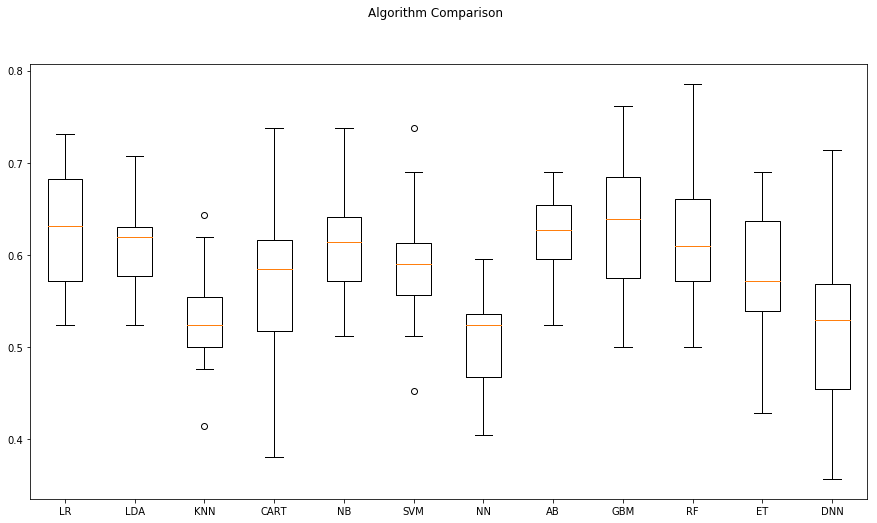

In [83]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

<a id='5'></a>
# 6. Model Tuning and Grid Search

Algorithm Tuning: Although some of the models show the most promising options. the grid search for Gradient Bossting Classifier is shown below.

In [84]:
# 1. Grid search : Logistic Regression Algorithm 
'''
penalty : str, ‘l1’, ‘l2’, ‘elasticnet’ or ‘none’, optional (default=’l2’)

C : float, optional (default=1.0)
Inverse of regularization strength; must be a positive float.Smaller values specify stronger regularization.
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
C= np.logspace(-3,3,7)
penalty = ["l1","l2"]# l1 lasso l2 ridge
param_grid = dict(C=C,penalty=penalty )
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.616376 using {'C': 1.0, 'penalty': 'l2'}
#8 nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
#7 0.572880 (0.067966) with: {'C': 0.001, 'penalty': 'l2'}
#9 nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
#6 0.611324 (0.055957) with: {'C': 0.01, 'penalty': 'l2'}
#10 nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
#5 0.611440 (0.040460) with: {'C': 0.1, 'penalty': 'l2'}
#11 nan (nan) with: {'C': 1.0, 'penalty': 'l1'}
#1 0.616376 (0.056352) with: {'C': 1.0, 'penalty': 'l2'}
#12 nan (nan) with: {'C': 10.0, 'penalty': 'l1'}
#1 0.616376 (0.056352) with: {'C': 10.0, 'penalty': 'l2'}
#13 nan (nan) with: {'C': 100.0, 'penalty': 'l1'}
#1 0.616376 (0.056352) with: {'C': 100.0, 'penalty': 'l2'}
#14 nan (nan) with: {'C': 1000.0, 'penalty': 'l1'}
#1 0.616376 (0.056352) with: {'C': 1000.0, 'penalty': 'l2'}


In [85]:
# Grid Search : LDA Algorithm 
'''
n_components : int, optional (default=None)
Number of components for dimensionality reduction. If None, will be set to min(n_classes - 1, n_features).
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
components  = [1,3,5,7,9,11,13,15,17,19,600]
param_grid = dict(n_components=components)
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.611614 using {'n_components': 1}
#1 0.611614 (0.055923) with: {'n_components': 1}
#1 0.611614 (0.055923) with: {'n_components': 3}
#1 0.611614 (0.055923) with: {'n_components': 5}
#1 0.611614 (0.055923) with: {'n_components': 7}
#1 0.611614 (0.055923) with: {'n_components': 9}
#1 0.611614 (0.055923) with: {'n_components': 11}
#1 0.611614 (0.055923) with: {'n_components': 13}
#1 0.611614 (0.055923) with: {'n_components': 15}
#1 0.611614 (0.055923) with: {'n_components': 17}
#1 0.611614 (0.055923) with: {'n_components': 19}
#1 0.611614 (0.055923) with: {'n_components': 600}


In [86]:
# Grid Search KNN algorithm tuning
'''
n_neighbors : int, optional (default = 5)
    Number of neighbors to use by default for kneighbors queries.

weights : str or callable, optional (default = ‘uniform’)
    weight function used in prediction. Possible values: ‘uniform’, ‘distance’

''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

neighbors = [1,3,5,7,9,11,13,15,17,19,21]
weights = ['uniform', 'distance']
param_grid = dict(n_neighbors=neighbors, weights = weights )
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.633275 using {'n_neighbors': 21, 'weights': 'distance'}
#20 0.575436 (0.053977) with: {'n_neighbors': 1, 'weights': 'uniform'}
#20 0.575436 (0.053977) with: {'n_neighbors': 1, 'weights': 'distance'}
#22 0.573403 (0.072922) with: {'n_neighbors': 3, 'weights': 'uniform'}
#18 0.585250 (0.069232) with: {'n_neighbors': 3, 'weights': 'distance'}
#17 0.587979 (0.076811) with: {'n_neighbors': 5, 'weights': 'uniform'}
#9 0.597271 (0.055041) with: {'n_neighbors': 5, 'weights': 'distance'}
#19 0.580778 (0.082174) with: {'n_neighbors': 7, 'weights': 'uniform'}
#15 0.590302 (0.083559) with: {'n_neighbors': 7, 'weights': 'distance'}
#16 0.590302 (0.062168) with: {'n_neighbors': 9, 'weights': 'uniform'}
#7 0.604530 (0.046160) with: {'n_neighbors': 9, 'weights': 'distance'}
#11 0.592451 (0.053386) with: {'n_neighbors': 11, 'weights': 'uniform'}
#5 0.611731 (0.044295) with: {'n_neighbors': 11, 'weights': 'distance'}
#14 0.592393 (0.067668) with: {'n_neighbors': 13, 'weights': 'uniform'}
#11 0.5

In [87]:
# Grid Search : CART Algorithm 
'''
max_depth : int or None, optional (default=None)
    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure 
    or until all leaves contain less than min_samples_split samples.

''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
max_depth = np.arange(2, 30)
param_grid = dict(max_depth=max_depth)
model = DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.625900 using {'max_depth': 5}
#8 0.589663 (0.073560) with: {'max_depth': 2}
#4 0.609001 (0.054688) with: {'max_depth': 3}
#2 0.618931 (0.072490) with: {'max_depth': 4}
#1 0.625900 (0.050793) with: {'max_depth': 5}
#4 0.609001 (0.058113) with: {'max_depth': 6}
#7 0.594890 (0.087547) with: {'max_depth': 7}
#6 0.606678 (0.067640) with: {'max_depth': 8}
#3 0.614402 (0.079824) with: {'max_depth': 9}
#23 0.570848 (0.079580) with: {'max_depth': 10}
#21 0.573403 (0.072913) with: {'max_depth': 11}
#10 0.587340 (0.079431) with: {'max_depth': 12}
#17 0.575784 (0.076352) with: {'max_depth': 13}
#11 0.585308 (0.072910) with: {'max_depth': 14}
#12 0.582927 (0.058242) with: {'max_depth': 15}
#24 0.568409 (0.081411) with: {'max_depth': 16}
#19 0.575610 (0.070155) with: {'max_depth': 17}
#18 0.575668 (0.086685) with: {'max_depth': 18}
#22 0.570964 (0.063675) with: {'max_depth': 19}
#28 0.558943 (0.087051) with: {'max_depth': 20}
#9 0.587573 (0.070178) with: {'max_depth': 21}
#26 0.563705 (0.087

In [88]:
# Grid Search : NB algorithm tuning
#GaussianNB only accepts priors as an argument so unless you have some priors to set for your model ahead of time 
#you will have nothing to grid search over.


In [89]:
# Grid Search: SVM algorithm tuning
'''
C : float, optional (default=1.0)
Penalty parameter C of the error term.

kernel : string, optional (default=’rbf’)
Specifies the kernel type to be used in the algorithm. 
It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. 
Parameters of SVM are C and kernel. 
Try a number of kernels with various values of C with less bias and more bias (less than and greater than 1.0 respectively
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5]
kernel_values = ['linear', 'poly', 'rbf']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.657143 using {'C': 1.0, 'kernel': 'rbf'}
#8 0.613705 (0.033500) with: {'C': 0.1, 'kernel': 'linear'}
#23 0.587515 (0.076731) with: {'C': 0.1, 'kernel': 'poly'}
#24 0.570499 (0.062319) with: {'C': 0.1, 'kernel': 'rbf'}
#18 0.608943 (0.044223) with: {'C': 0.3, 'kernel': 'linear'}
#22 0.601800 (0.066519) with: {'C': 0.3, 'kernel': 'poly'}
#7 0.628281 (0.060724) with: {'C': 0.3, 'kernel': 'rbf'}
#11 0.611324 (0.046564) with: {'C': 0.5, 'kernel': 'linear'}
#18 0.608943 (0.062315) with: {'C': 0.5, 'kernel': 'poly'}
#2 0.656969 (0.068917) with: {'C': 0.5, 'kernel': 'rbf'}
#8 0.613705 (0.048677) with: {'C': 0.7, 'kernel': 'linear'}
#8 0.613705 (0.061995) with: {'C': 0.7, 'kernel': 'poly'}
#6 0.645006 (0.062413) with: {'C': 0.7, 'kernel': 'rbf'}
#11 0.611324 (0.046564) with: {'C': 0.9, 'kernel': 'linear'}
#16 0.611208 (0.068144) with: {'C': 0.9, 'kernel': 'poly'}
#3 0.654704 (0.064995) with: {'C': 0.9, 'kernel': 'rbf'}
#11 0.611324 (0.046564) with: {'C': 1.0, 'kernel': 'linear'}
#20 0.6

In [90]:
# Grid Search: Ada boost Algorithm Tuning 
'''
n_estimators : integer, optional (default=50)
    The maximum number of estimators at which boosting is terminated. 
    In case of perfect fit, the learning procedure is stopped early.
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [10, 100]
param_grid = dict(n_estimators=n_estimators)
model = AdaBoostClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.614053 using {'n_estimators': 100}
#2 0.609350 (0.062495) with: {'n_estimators': 10}
#1 0.614053 (0.058883) with: {'n_estimators': 100}


In [91]:
# Grid Search: GradientBoosting Tuning
'''
n_estimators : int (default=100)
    The number of boosting stages to perform. 
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators. 
    The maximum depth limits the number of nodes in the tree. 
    Tune this parameter for best performance; the best value depends on the interaction of the input variables.

''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [20,180]
max_depth= [3,5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.632811 using {'max_depth': 3, 'n_estimators': 180}
#4 0.613937 (0.068854) with: {'max_depth': 3, 'n_estimators': 20}
#1 0.632811 (0.094400) with: {'max_depth': 3, 'n_estimators': 180}
#2 0.628339 (0.084035) with: {'max_depth': 5, 'n_estimators': 20}
#3 0.625900 (0.068561) with: {'max_depth': 5, 'n_estimators': 180}


In [92]:
# Grid Search: Random Forest Classifier
'''
n_estimators : int (default=100)
    The number of boosting stages to perform. 
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators. 
    The maximum depth limits the number of nodes in the tree. 
    Tune this parameter for best performance; the best value depends on the interaction of the input variables    
criterion : string, optional (default=”gini”)
    The function to measure the quality of a split. 
    Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 
    
'''   
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [20,80]
max_depth= [5,10]
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.649710 using {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#1 0.649710 (0.093241) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#6 0.626016 (0.079640) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}
#8 0.606911 (0.063889) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#4 0.628455 (0.069711) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#7 0.614053 (0.076060) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 20}
#2 0.630720 (0.057585) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 80}
#5 0.626074 (0.071196) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 20}
#3 0.628513 (0.068331) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}


In [93]:
# Grid Search: ExtraTreesClassifier()
'''
n_estimators : int (default=100)
    The number of boosting stages to perform. 
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators. 
    The maximum depth limits the number of nodes in the tree. 
    Tune this parameter for best performance; the best value depends on the interaction of the input variables    
criterion : string, optional (default=”gini”)
    The function to measure the quality of a split. 
    Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 
'''   
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [20,80]
max_depth= [5,10]
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
model = ExtraTreesClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.642451 using {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 20}
#4 0.611672 (0.089702) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#3 0.632985 (0.053067) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}
#6 0.597735 (0.096033) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#8 0.597387 (0.095569) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#1 0.642451 (0.077588) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 20}
#2 0.633101 (0.062141) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 80}
#5 0.604297 (0.067871) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 20}
#7 0.597561 (0.096830) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}


In [94]:
# Grid Search : NN algorithm tuning
'''
hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
    The ith element represents the number of neurons in the ith hidden layer.
Other Parameters that can be tuned
    learning_rate_init : double, optional, default 0.001
        The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.
    max_iter : int, optional, default 200
        Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
hidden_layer_sizes=[(20,), (50,), (20,20), (20, 30, 20)]
param_grid = dict(hidden_layer_sizes=hidden_layer_sizes)
model = MLPClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.635366 using {'hidden_layer_sizes': (20,)}
#1 0.635366 (0.052710) with: {'hidden_layer_sizes': (20,)}
#4 0.604413 (0.050579) with: {'hidden_layer_sizes': (50,)}
#3 0.609059 (0.043019) with: {'hidden_layer_sizes': (20, 20)}
#2 0.633217 (0.066650) with: {'hidden_layer_sizes': (20, 30, 20)}


In [95]:
# Grid Search : Deep Neural Network algorithm tuning
'''
neurons: int
    Number of patterns shown to the network before the weights are updated.     
batch_size: int
    Number of observation to read at a time and keep in memory.
epochs: int
    Number of times that the entire training dataset is shown to the network during training.
activation:
    The activation function controls the non-linearity of individual neurons and when to fire.
learn_rate :int
    controls how much to update the weight at the end of each batch
momentum : int
     momentum controls how much to let the previous update influence the current weight update
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
#Hyperparameters that can be modified
neurons = [1, 5, 10, 15]
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]

#Changing only Neurons for the sake of simplicity
param_grid = dict(neurons=neurons)
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.625726 using {'neurons': 15}
#4 0.590128 (0.042692) with: {'neurons': 1}
#3 0.604065 (0.039938) with: {'neurons': 5}
#2 0.613879 (0.055881) with: {'neurons': 10}
#1 0.625726 (0.069088) with: {'neurons': 15}


<a id='6'></a>
# 7. Finalise the Model

Looking at the details above GBM might be worthy of further study, but for now SVM shows a lot of promise as a low complexity and stable model for this problem.

Finalize Model with best parameters found during tuning step.

<a id='6.1'></a>
## 7.1. Results on the Test Dataset

In [96]:
# prepare model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingClassifier(n_estimators=20, max_depth=5) # rbf is default kernel
model.fit(X_train, Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [97]:
# estimate accuracy on validation set
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.6666666666666666
[[30 22]
 [13 40]]
              precision    recall  f1-score   support

           0       0.70      0.58      0.63        52
           1       0.65      0.75      0.70        53

    accuracy                           0.67       105
   macro avg       0.67      0.67      0.66       105
weighted avg       0.67      0.67      0.66       105



In [98]:
predictions

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [99]:
Y_validation

998    0
989    1
664    1
474    0
601    0
918    0
114    1
7      1
593    0
201    1
946    0
156    1
375    0
513    1
177    1
89     0
466    0
537    1
634    0
927    0
454    0
648    0
938    0
530    1
818    1
498    1
197    0
961    1
405    0
432    1
806    1
35     0
531    0
334    0
652    0
22     1
677    0
605    1
515    1
51     1
145    1
729    1
475    0
313    0
252    0
97     1
969    1
88     1
501    1
38     1
273    0
793    1
576    1
479    1
442    1
320    0
212    0
172    0
917    0
812    0
207    1
72     1
727    0
491    0
849    0
919    0
328    1
834    0
835    0
721    0
711    0
347    1
896    1
831    0
521    0
930    1
832    0
623    1
684    1
666    1
458    1
157    1
602    0
284    1
714    0
107    1
422    1
653    0
730    1
416    0
293    1
923    1
876    1
191    0
892    1
709    1
814    0
471    0
398    0
506    1
597    0
44     0
34     1
840    0
47     1
Name: Risk_Code, dtype: int32

<a id='6.2'></a>
## 7.2. Variable Intuition/Feature Importance
Looking at the details above GBM might be worthy of further study, but for now SVM shows a lot of promise as a low complexity and stable model for this problem.
Let us look into the Feature Importance of the GBM model

[0.14559042 0.02828504 0.45990366 0.23325303 0.00326138 0.02257884
 0.03420548 0.02710298 0.04581917]


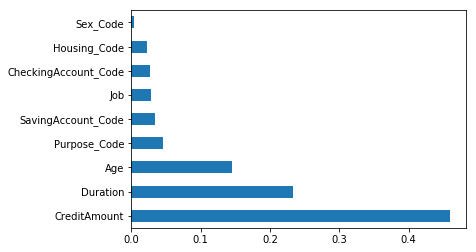

In [100]:
import pandas as pd
import numpy as np
model = GradientBoostingClassifier()
model.fit(rescaledX,Y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
pyplot.show()

<a id='6.3'></a>
## 7.3. Save Model for Later Use

In [101]:
# Save Model Using Pickle
from pickle import dump
from pickle import load

# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))

In [102]:
# some time later...
# load the model from disk
loaded_model = load(open(filename, 'rb'))
# estimate accuracy on validation set
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
result = accuracy_score(Y_validation, predictions)
print(result)

0.7047619047619048
